# This is a the All Sky Simulation for YSO Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
import astropy.units as u
from targetlib import testfield_gal,testfield_fk5,testfield_ecl,h2exp
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

# Star Selection Rules
The star selection rules are laid out in detail on this webpage: https://wiki.sdss.org/display/MWM/YSO+selection+function

## History
- New in Gamma-2-yso
   - Added in new targets based on BOSS column
   - Added four new cadences in order to get BOSS observations
- New in Gamma-2-cad_match
    - All cadence minimum = 1
    - All cadence maximum = 3000
    - Priority = 70
- New in Gamma-0
    - Updated targets to latest version from Feb 26, 2020
    - Removed Cluster targets
    - Removed the 6x1 cadence

In [2]:
ver = 'gamma-2-yso'
yso_tab = Table.read('workspace/target_files/YSO/{}/ysotargeting-0226.fits'.format(ver))
yso_tab

DESIGNATION,RA,DEC,BOSS,PARALLAX,J_M_2MASS,H_M_2MASS,K_M_2MASS,PHOT_G_MEAN_MAG,PHOT_BP_MEAN_MAG,PHOT_RP_MEAN_MAG,W1MPRO,W2MPRO,W3MPRO,W4MPRO,S1,S2,S2_5,S3,OB,CMZ,CLUST
bytes28,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,bool,bool,bool
Gaia DR2 431604463341241984,0.010017289661103214,63.71713170432774,4,1.3669851860111404,13.720000267028809,12.996999740600586,12.79699993133545,15.933618545532227,16.78079605102539,15.011147499084473,12.682999610900879,12.732999801635742,11.454999923706055,9.496000289916992,False,False,False,True,False,False,False
1635721458409799680,0.014209315287625012,-20.914268007597002,3,0.5236211763712381,8.63599967956543,8.381999969482422,8.286999702453613,9.642487525939941,9.961844444274902,9.184581756591797,8.26099967956543,8.281999588012695,8.265000343322754,8.185999870300293,False,False,False,False,True,False,False
528988203903276672,0.014323674891032938,68.1157897143162,3,0.8502652049064636,12.609999656677246,12.14900016784668,12.00100040435791,14.868688,15.699005,13.927637,11.70300006866455,11.696000099182129,12.289999961853027,8.72599983215332,False,False,False,False,False,False,True
J000006.45+675349.7,0.0268906,67.8971651,3,0.8714,11.856,11.096,10.525,14.363132,15.354439,13.376985,9.627,9.159,6.953,4.498,True,False,False,False,False,False,True
528985459423408768,0.027671146935143182,67.96384774418541,-1,0.981224000453949,13.550000190734863,12.616999626159668,12.295999526977539,16.850767,18.366426,15.614505,12.154999732971191,12.09000015258789,12.496000289916992,8.942999839782715,False,False,False,False,False,False,True
528607639740035072,0.041183816021420155,67.79902174590075,3,0.9192159175872803,12.923999786376953,12.130999565124512,11.892000198364258,15.582217,16.730835,14.507209,11.76200008392334,11.770999908447266,12.067000389099121,8.970000267028809,False,False,False,False,False,False,True
Gaia DR2 538037051459081856,0.04969500175307085,74.47475298992195,3,1.1533771334154514,13.428000450134277,12.861000061035156,12.652000427246094,15.511549949645996,16.190486907958984,14.602104187011719,12.437000274658203,12.487000465393066,11.753999710083008,9.305000305175781,False,False,False,True,False,False,False
Gaia DR2 429950007577101952,0.0537805339342776,62.496650295907386,3,1.0837072903705394,12.930000305175781,12.489999771118164,12.376999855041504,14.668299674987793,15.250387191772461,13.940083503723145,12.317000389099121,12.388999938964844,13.057999610900879,9.737000465393066,False,False,False,True,False,False,False
529126501849762816,0.059846545120721795,68.71621301678837,3,0.8876559138298035,11.093000411987305,10.97700023651123,10.862000465393066,12.467026,12.949165,11.8181305,10.793999671936035,10.817000389099121,11.72700023651123,9.107999801635742,False,False,False,False,False,False,True


## Plot Hmag distribution of targets

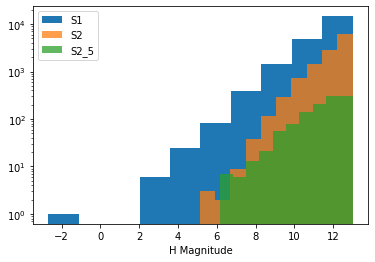

In [3]:
plt.hist(yso_tab['H_M_2MASS'][(yso_tab['S1'] == True)],label='S1')
plt.hist(yso_tab['H_M_2MASS'][(yso_tab['S2'] == True)],label='S2',alpha=0.75)
plt.hist(yso_tab['H_M_2MASS'][(yso_tab['S2_5'] == True)],label='S2_5',alpha=0.75)
plt.yscale('log')
plt.xlabel('H Magnitude')
plt.legend()
plt.show()

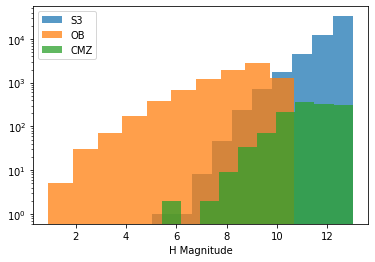

In [4]:
#plt.hist(yso_tab['H_M_2MASS'][(yso_tab['CLUST'] == True)],label='CLUST')
plt.hist(yso_tab['H_M_2MASS'][(yso_tab['S3'] == True)],label='S3',alpha=0.75)
plt.hist(yso_tab['H_M_2MASS'][(yso_tab['OB'] == True)],label='OB',alpha=0.75)
plt.hist(yso_tab['H_M_2MASS'][(yso_tab['CMZ'] == True)],label='CMZ',alpha=0.75)
plt.yscale('log')
plt.xlabel('H Magnitude')
plt.legend()
plt.show()

## Plot All Targets

/home/deleenm/Dropbox/Research/notebooks/SDSS-V SimTargets/allsky/targetlib.py:148: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap = Basemap(projection='moll', lon_0=180,lat_0=0)


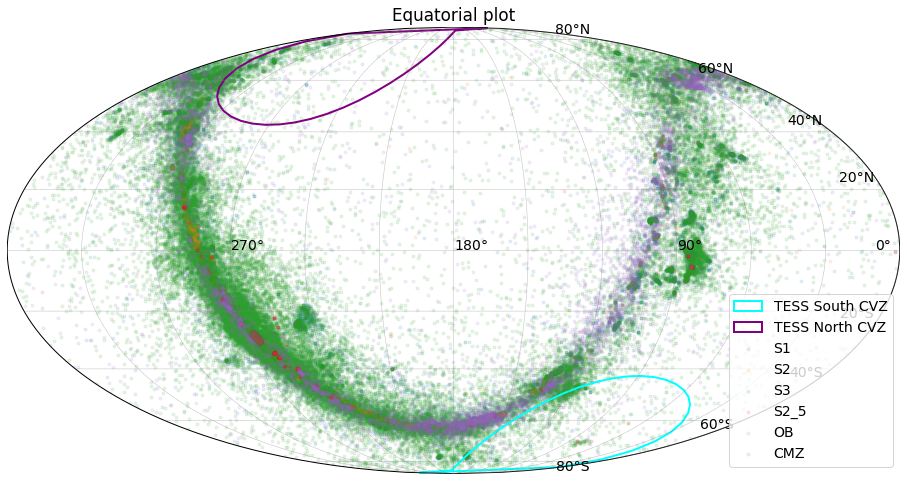

In [5]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot YSO Targets
s1x,s1y = bmap(yso_tab['RA'][(yso_tab['S1'] == True)],yso_tab['DEC'][(yso_tab['S1'] == True)])
bmap.scatter(s1x,s1y,marker='.',label='S1',alpha=0.1)
s2x,s2y = bmap(yso_tab['RA'][(yso_tab['S2'] == True)],yso_tab['DEC'][(yso_tab['S2'] == True)])
bmap.scatter(s2x,s2y,marker='.',label='S2',alpha=0.1)
s3x,s3y = bmap(yso_tab['RA'][(yso_tab['S3'] == True)],yso_tab['DEC'][(yso_tab['S3'] == True)])
bmap.scatter(s3x,s3y,marker='.',label='S3',alpha=0.1)
s2_5x,s2_5y = bmap(yso_tab['RA'][(yso_tab['S2_5'] == True)],yso_tab['DEC'][(yso_tab['S2_5'] == True)])
bmap.scatter(s2_5x,s2_5y,marker='.',label='S2_5',alpha=0.1)
obx,oby = bmap(yso_tab['RA'][(yso_tab['OB'] == True)],yso_tab['DEC'][(yso_tab['OB'] == True)])
bmap.scatter(obx,oby,marker='.',label='OB',alpha=0.1)
#clustx,clusty = bmap(yso_tab['RA'][(yso_tab['CLUST'] == True)],yso_tab['DEC'][(yso_tab['CLUST'] == True)])
#bmap.scatter(clustx,clusty,marker='.',label='CLUST',alpha=0.1)
cmzx,cmzy = bmap(yso_tab['RA'][(yso_tab['CMZ'] == True)],yso_tab['DEC'][(yso_tab['CMZ'] == True)])
bmap.scatter(cmzx,cmzy,marker='.',label='CMZ',alpha=0.1)
plt.title("Equatorial plot")
plt.legend(loc=4)
plt.show()

## Create Target Table

In [6]:
target_tab = Table()

## Remove Cluster stars from list
We are not currently doing cluster targets. We define a cluster target as one that does not have a true value in any other column.

In [7]:
good_ind = yso_tab['S1'] + yso_tab['S2'] + yso_tab['S2_5'] + yso_tab['S3'] + yso_tab['OB'] + yso_tab['CMZ']
yso_sm_tab = yso_tab[good_ind]
yso_sm_tab

DESIGNATION,RA,DEC,BOSS,PARALLAX,J_M_2MASS,H_M_2MASS,K_M_2MASS,PHOT_G_MEAN_MAG,PHOT_BP_MEAN_MAG,PHOT_RP_MEAN_MAG,W1MPRO,W2MPRO,W3MPRO,W4MPRO,S1,S2,S2_5,S3,OB,CMZ,CLUST
bytes28,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,bool,bool,bool
Gaia DR2 431604463341241984,0.010017289661103214,63.71713170432774,4,1.3669851860111404,13.720000267028809,12.996999740600586,12.79699993133545,15.933618545532227,16.78079605102539,15.011147499084473,12.682999610900879,12.732999801635742,11.454999923706055,9.496000289916992,False,False,False,True,False,False,False
1635721458409799680,0.014209315287625012,-20.914268007597002,3,0.5236211763712381,8.63599967956543,8.381999969482422,8.286999702453613,9.642487525939941,9.961844444274902,9.184581756591797,8.26099967956543,8.281999588012695,8.265000343322754,8.185999870300293,False,False,False,False,True,False,False
J000006.45+675349.7,0.0268906,67.8971651,3,0.8714,11.856,11.096,10.525,14.363132,15.354439,13.376985,9.627,9.159,6.953,4.498,True,False,False,False,False,False,True
Gaia DR2 538037051459081856,0.04969500175307085,74.47475298992195,3,1.1533771334154514,13.428000450134277,12.861000061035156,12.652000427246094,15.511549949645996,16.190486907958984,14.602104187011719,12.437000274658203,12.487000465393066,11.753999710083008,9.305000305175781,False,False,False,True,False,False,False
Gaia DR2 429950007577101952,0.0537805339342776,62.496650295907386,3,1.0837072903705394,12.930000305175781,12.489999771118164,12.376999855041504,14.668299674987793,15.250387191772461,13.940083503723145,12.317000389099121,12.388999938964844,13.057999610900879,9.737000465393066,False,False,False,True,False,False,False
Gaia DR2 528609770043800832,0.06078556244630524,67.89390417628584,3,0.9508368448022183,12.668999671936035,12.043000221252441,11.817000389099121,15.143421173095703,16.161418914794922,14.132448196411133,11.692000389099121,11.682999610900879,11.401000022888184,8.956999778747559,False,False,False,True,False,False,True
Gaia DR2 528609220287992320,0.066782,67.8438261,4,0.7896,13.277,12.363,11.884,16.144276,17.351608,15.028124,11.238,10.669,8.21,6.34,True,False,False,True,False,False,True
Gaia DR2 528985253265000320,0.08641110996540925,67.93125481025271,5,0.9227129663336868,13.494999885559082,12.678000450134277,12.383999824523926,16.351003646850586,17.62185287475586,15.228521347045898,12.210000038146973,12.20199966430664,11.847999572753906,8.734000205993652,False,False,False,True,False,False,True
J000026.70+662854.5,0.1112814,66.4818104,3,1.2728,12.22,11.195,10.618,15.943613,17.883507,14.616957,9.795,9.128,6.288,4.364,True,False,False,False,False,False,True


## Generate BOSS Targets

In [8]:
boss_tab = yso_sm_tab[(yso_sm_tab['BOSS'] > 0)]
boss_tab

DESIGNATION,RA,DEC,BOSS,PARALLAX,J_M_2MASS,H_M_2MASS,K_M_2MASS,PHOT_G_MEAN_MAG,PHOT_BP_MEAN_MAG,PHOT_RP_MEAN_MAG,W1MPRO,W2MPRO,W3MPRO,W4MPRO,S1,S2,S2_5,S3,OB,CMZ,CLUST
bytes28,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,bool,bool,bool
Gaia DR2 431604463341241984,0.010017289661103214,63.71713170432774,4,1.3669851860111404,13.720000267028809,12.996999740600586,12.79699993133545,15.933618545532227,16.78079605102539,15.011147499084473,12.682999610900879,12.732999801635742,11.454999923706055,9.496000289916992,False,False,False,True,False,False,False
1635721458409799680,0.014209315287625012,-20.914268007597002,3,0.5236211763712381,8.63599967956543,8.381999969482422,8.286999702453613,9.642487525939941,9.961844444274902,9.184581756591797,8.26099967956543,8.281999588012695,8.265000343322754,8.185999870300293,False,False,False,False,True,False,False
J000006.45+675349.7,0.0268906,67.8971651,3,0.8714,11.856,11.096,10.525,14.363132,15.354439,13.376985,9.627,9.159,6.953,4.498,True,False,False,False,False,False,True
Gaia DR2 538037051459081856,0.04969500175307085,74.47475298992195,3,1.1533771334154514,13.428000450134277,12.861000061035156,12.652000427246094,15.511549949645996,16.190486907958984,14.602104187011719,12.437000274658203,12.487000465393066,11.753999710083008,9.305000305175781,False,False,False,True,False,False,False
Gaia DR2 429950007577101952,0.0537805339342776,62.496650295907386,3,1.0837072903705394,12.930000305175781,12.489999771118164,12.376999855041504,14.668299674987793,15.250387191772461,13.940083503723145,12.317000389099121,12.388999938964844,13.057999610900879,9.737000465393066,False,False,False,True,False,False,False
Gaia DR2 528609770043800832,0.06078556244630524,67.89390417628584,3,0.9508368448022183,12.668999671936035,12.043000221252441,11.817000389099121,15.143421173095703,16.161418914794922,14.132448196411133,11.692000389099121,11.682999610900879,11.401000022888184,8.956999778747559,False,False,False,True,False,False,True
Gaia DR2 528609220287992320,0.066782,67.8438261,4,0.7896,13.277,12.363,11.884,16.144276,17.351608,15.028124,11.238,10.669,8.21,6.34,True,False,False,True,False,False,True
Gaia DR2 528985253265000320,0.08641110996540925,67.93125481025271,5,0.9227129663336868,13.494999885559082,12.678000450134277,12.383999824523926,16.351003646850586,17.62185287475586,15.228521347045898,12.210000038146973,12.20199966430664,11.847999572753906,8.734000205993652,False,False,False,True,False,False,True
J000026.70+662854.5,0.1112814,66.4818104,3,1.2728,12.22,11.195,10.618,15.943613,17.883507,14.616957,9.795,9.128,6.288,4.364,True,False,False,False,False,False,True


In [17]:
cadence_arr = np.repeat('mwm_yso_3x1',len(yso_sm_tab))
print("Number of APOGEE Targets: {}".format(len(cadence_arr)))

Number of APOGEE Targets: 93945


In [18]:
cadence_list = list(cadence_arr)
for i in range(len(boss_tab)):
    cadence_list.append('mwm_boss-yso_{}x1'.format(boss_tab['BOSS'][i]))
cadence_arr = np.array(cadence_list)
print(np.unique(cadence_arr))
print("Number of APOGEE+BOSS Targets: {}".format(len(cadence_arr)))

['mwm_boss-yso_3x1' 'mwm_boss-yso_4x1' 'mwm_boss-yso_5x1'
 'mwm_boss-yso_6x1' 'mwm_yso_3x1']
Number of APOGEE+BOSS Targets: 161392


In [21]:
combined_tab = vstack([yso_sm_tab,boss_tab])
combined_tab

DESIGNATION,RA,DEC,BOSS,PARALLAX,J_M_2MASS,H_M_2MASS,K_M_2MASS,PHOT_G_MEAN_MAG,PHOT_BP_MEAN_MAG,PHOT_RP_MEAN_MAG,W1MPRO,W2MPRO,W3MPRO,W4MPRO,S1,S2,S2_5,S3,OB,CMZ,CLUST
bytes28,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,bool,bool,bool
Gaia DR2 431604463341241984,0.010017289661103214,63.71713170432774,4,1.3669851860111404,13.720000267028809,12.996999740600586,12.79699993133545,15.933618545532227,16.78079605102539,15.011147499084473,12.682999610900879,12.732999801635742,11.454999923706055,9.496000289916992,False,False,False,True,False,False,False
1635721458409799680,0.014209315287625012,-20.914268007597002,3,0.5236211763712381,8.63599967956543,8.381999969482422,8.286999702453613,9.642487525939941,9.961844444274902,9.184581756591797,8.26099967956543,8.281999588012695,8.265000343322754,8.185999870300293,False,False,False,False,True,False,False
J000006.45+675349.7,0.0268906,67.8971651,3,0.8714,11.856,11.096,10.525,14.363132,15.354439,13.376985,9.627,9.159,6.953,4.498,True,False,False,False,False,False,True
Gaia DR2 538037051459081856,0.04969500175307085,74.47475298992195,3,1.1533771334154514,13.428000450134277,12.861000061035156,12.652000427246094,15.511549949645996,16.190486907958984,14.602104187011719,12.437000274658203,12.487000465393066,11.753999710083008,9.305000305175781,False,False,False,True,False,False,False
Gaia DR2 429950007577101952,0.0537805339342776,62.496650295907386,3,1.0837072903705394,12.930000305175781,12.489999771118164,12.376999855041504,14.668299674987793,15.250387191772461,13.940083503723145,12.317000389099121,12.388999938964844,13.057999610900879,9.737000465393066,False,False,False,True,False,False,False
Gaia DR2 528609770043800832,0.06078556244630524,67.89390417628584,3,0.9508368448022183,12.668999671936035,12.043000221252441,11.817000389099121,15.143421173095703,16.161418914794922,14.132448196411133,11.692000389099121,11.682999610900879,11.401000022888184,8.956999778747559,False,False,False,True,False,False,True
Gaia DR2 528609220287992320,0.066782,67.8438261,4,0.7896,13.277,12.363,11.884,16.144276,17.351608,15.028124,11.238,10.669,8.21,6.34,True,False,False,True,False,False,True
Gaia DR2 528985253265000320,0.08641110996540925,67.93125481025271,5,0.9227129663336868,13.494999885559082,12.678000450134277,12.383999824523926,16.351003646850586,17.62185287475586,15.228521347045898,12.210000038146973,12.20199966430664,11.847999572753906,8.734000205993652,False,False,False,True,False,False,True
J000026.70+662854.5,0.1112814,66.4818104,3,1.2728,12.22,11.195,10.618,15.943613,17.883507,14.616957,9.795,9.128,6.288,4.364,True,False,False,False,False,False,True


In [22]:
target_tab['ra'] = combined_tab['RA']
target_tab['dec'] = combined_tab['DEC']
target_tab['cadence'] = cadence_arr
target_tab

ra,dec,cadence
float64,float64,str16
0.010017289661103214,63.71713170432774,mwm_yso_3x1
0.014209315287625012,-20.914268007597002,mwm_yso_3x1
0.0268906,67.8971651,mwm_yso_3x1
0.04969500175307085,74.47475298992195,mwm_yso_3x1
0.0537805339342776,62.496650295907386,mwm_yso_3x1
0.06078556244630524,67.89390417628584,mwm_yso_3x1
0.066782,67.8438261,mwm_yso_3x1
0.08641110996540925,67.93125481025271,mwm_yso_3x1
0.1112814,66.4818104,mwm_yso_3x1


## Set type

In [23]:
type_arr = np.repeat('XXXXXX',len(combined_tab))
type_arr[(combined_tab['S1'] == True)] = 'YSO_S1'
type_arr[(combined_tab['S2'] == True)] = 'YSO_S2'
type_arr[(combined_tab['S2_5'] == True)] = 'YSO_S2_5'
type_arr[(combined_tab['S3'] == True)] = 'YSO_S3'
type_arr[(combined_tab['OB'] == True)] = 'YSO_OB'
type_arr[(combined_tab['CMZ'] == True)] = 'YSO_CMZ'
target_tab['type'] = type_arr
target_tab

ra,dec,cadence,type
float64,float64,str16,str6
0.010017289661103214,63.71713170432774,mwm_yso_3x1,YSO_S3
0.014209315287625012,-20.914268007597002,mwm_yso_3x1,YSO_OB
0.0268906,67.8971651,mwm_yso_3x1,YSO_S1
0.04969500175307085,74.47475298992195,mwm_yso_3x1,YSO_S3
0.0537805339342776,62.496650295907386,mwm_yso_3x1,YSO_S3
0.06078556244630524,67.89390417628584,mwm_yso_3x1,YSO_S3
0.066782,67.8438261,mwm_yso_3x1,YSO_S3
0.08641110996540925,67.93125481025271,mwm_yso_3x1,YSO_S3
0.1112814,66.4818104,mwm_yso_3x1,YSO_S1


## Set priority
For now, no priority differences among targets. Setting to default of 70

In [24]:
target_tab['priority'] = np.repeat(np.array(70,dtype='int32'),len(combined_tab))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(combined_tab))

In [25]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str16,str6,int32,float32
0.010017289661103214,63.71713170432774,mwm_yso_3x1,YSO_S3,70,1.0
0.014209315287625012,-20.914268007597002,mwm_yso_3x1,YSO_OB,70,1.0
0.0268906,67.8971651,mwm_yso_3x1,YSO_S1,70,1.0
0.04969500175307085,74.47475298992195,mwm_yso_3x1,YSO_S3,70,1.0
0.0537805339342776,62.496650295907386,mwm_yso_3x1,YSO_S3,70,1.0
0.06078556244630524,67.89390417628584,mwm_yso_3x1,YSO_S3,70,1.0
0.066782,67.8438261,mwm_yso_3x1,YSO_S3,70,1.0
0.08641110996540925,67.93125481025271,mwm_yso_3x1,YSO_S3,70,1.0
0.1112814,66.4818104,mwm_yso_3x1,YSO_S1,70,1.0


In [26]:
target_tab.write('{}/mwm_yso_target_{}.fits'.format(ver,ver),overwrite=True)

## Create Cadence Table
All targets get 3 APOGEE visits and the number of BOSS visits in the BOSS column

In [28]:
cadence_tab = Table()

In [29]:
cadence_tab['cadence'] = np.array(['mwm_yso_3x1','mwm_boss-yso_3x1','mwm_boss-yso_4x1','mwm_boss-yso_5x1',
                                   'mwm_boss-yso_6x1'])
cadence_tab['nepochs'] = np.array([3,3,4,5,6],dtype='int32')
delta = np.array([[0,1,30,np.nan,np.nan,np.nan],
                  [0,1,30,np.nan,np.nan,np.nan],
                  [0,1,30,30,np.nan,np.nan],
                  [0,1,30,30,30,np.nan],
                  [0,1,30,30,30,30]],dtype='float32')
print(delta)
cadence_tab['delta'] = delta

[[ 0.  1. 30. nan nan nan]
 [ 0.  1. 30. nan nan nan]
 [ 0.  1. 30. 30. nan nan]
 [ 0.  1. 30. 30. 30. nan]
 [ 0.  1. 30. 30. 30. 30.]]


In [30]:
cadence_tab

cadence,nepochs,delta [6]
str16,int32,float32
mwm_yso_3x1,3,0.0 .. nan
mwm_boss-yso_3x1,3,0.0 .. nan
mwm_boss-yso_4x1,4,0.0 .. nan
mwm_boss-yso_5x1,5,0.0 .. nan
mwm_boss-yso_6x1,6,0.0 .. 30.0


In [31]:
delta_min = np.array([[0,1,1,np.nan,np.nan,np.nan],
                      [0,1,1,np.nan,np.nan,np.nan],
                      [0,1,1,1,np.nan,np.nan],
                      [0,1,1,1,1,np.nan],
                      [0,1,1,1,1,1]],dtype='float32')
print(delta_min)
cadence_tab['delta_min'] = delta_min

[[ 0.  1.  1. nan nan nan]
 [ 0.  1.  1. nan nan nan]
 [ 0.  1.  1.  1. nan nan]
 [ 0.  1.  1.  1.  1. nan]
 [ 0.  1.  1.  1.  1.  1.]]


In [32]:
delta_max = np.array([[0,3000,3000,np.nan,np.nan,np.nan],
                      [0,3000,3000,np.nan,np.nan,np.nan],
                      [0,3000,3000,3000,np.nan,np.nan],
                      [0,3000,3000,3000,3000,np.nan],
                      [0,3000,3000,3000,3000,3000]],dtype='float32')
print(delta_max)
cadence_tab['delta_max'] = delta_max

[[   0. 3000. 3000.   nan   nan   nan]
 [   0. 3000. 3000.   nan   nan   nan]
 [   0. 3000. 3000. 3000.   nan   nan]
 [   0. 3000. 3000. 3000. 3000.   nan]
 [   0. 3000. 3000. 3000. 3000. 3000.]]


In [33]:
lunation = np.array([[0,1,1,np.nan,np.nan,np.nan],
                     [0,1,1,np.nan,np.nan,np.nan],
                     [0,1,1,1,np.nan,np.nan],
                     [0,1,1,1,1,np.nan],
                     [0,1,1,1,1,1]],dtype='float32')
print(lunation)
cadence_tab['lunation'] = lunation

[[ 0.  1.  1. nan nan nan]
 [ 0.  1.  1. nan nan nan]
 [ 0.  1.  1.  1. nan nan]
 [ 0.  1.  1.  1.  1. nan]
 [ 0.  1.  1.  1.  1.  1.]]


In [35]:
instrument = np.array([['apogee','apogee','apogee',np.nan,np.nan,np.nan],
                     ['boss','boss','boss',np.nan,np.nan,np.nan],
                     ['boss','boss','boss','boss',np.nan,np.nan],
                     ['boss','boss','boss','boss','boss',np.nan],
                     ['boss','boss','boss','boss','boss','boss']],dtype='str')
print(instrument)
cadence_tab['instrument'] = instrument

[['apogee' 'apogee' 'apogee' 'nan' 'nan' 'nan']
 ['boss' 'boss' 'boss' 'nan' 'nan' 'nan']
 ['boss' 'boss' 'boss' 'boss' 'nan' 'nan']
 ['boss' 'boss' 'boss' 'boss' 'boss' 'nan']
 ['boss' 'boss' 'boss' 'boss' 'boss' 'boss']]


In [36]:
cadence_tab

cadence,nepochs,delta [6],delta_min [6],delta_max [6],lunation [6],instrument [6]
str16,int32,float32,float32,float32,float32,str6
mwm_yso_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.0 .. nan,apogee .. nan
mwm_boss-yso_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.0 .. nan,boss .. nan
mwm_boss-yso_4x1,4,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.0 .. nan,boss .. nan
mwm_boss-yso_5x1,5,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.0 .. nan,boss .. nan
mwm_boss-yso_6x1,6,0.0 .. 30.0,0.0 .. 1.0,0.0 .. 3000.0,0.0 .. 1.0,boss .. boss


In [37]:
cadence_tab.write('{}/mwm_yso_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [38]:
test =  Table.read('{}/mwm_yso_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta [6],delta_min [6],delta_max [6],lunation [6],instrument [6]
bytes16,int32,float32,float32,float32,float32,bytes24
mwm_yso_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.0 .. nan,apogee .. nan
mwm_boss-yso_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.0 .. nan,boss .. nan
mwm_boss-yso_4x1,4,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.0 .. nan,boss .. nan
mwm_boss-yso_5x1,5,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.0 .. nan,boss .. nan
mwm_boss-yso_6x1,6,0.0 .. 30.0,0.0 .. 1.0,0.0 .. 3000.0,0.0 .. 1.0,boss .. boss
